In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from PIL import Image, ImageOps
import sys



In [15]:
image = Image.open('/vast/amr10211/cv_data/segm/WOMEN-Sweaters-id_00004701-01_4_full_segm.png')

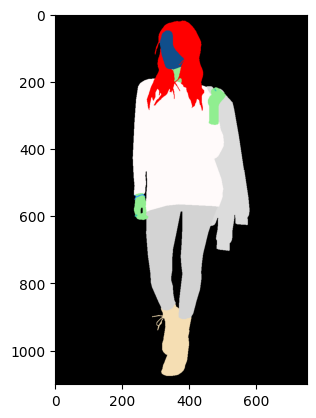

In [16]:
plt.imshow(image)

In [17]:
image2 = Image.open('/vast/amr10211/cv_data/segm/WOMEN-Sweaters-id_00004701-02_4_full_segm.png')

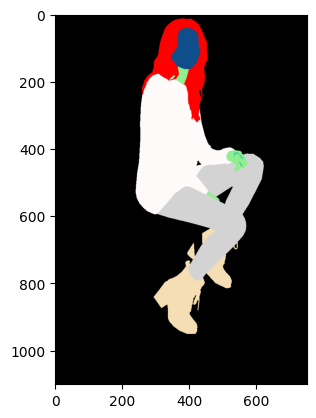

In [18]:
plt.imshow(image2)

In [21]:
image3 = Image.open('/vast/amr10211/cv_data/images/WOMEN-Sweaters-id_00004701-01_4_full.jpg')

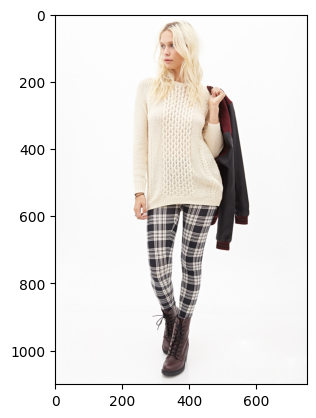

In [22]:
plt.imshow(image3)

In [23]:

segm = Image.open('/vast/amr10211/cv_data/segm/WOMEN-Sweaters-id_00004701-01_4_full_segm.png')
segm = np.array(segm) # shape: [750, 1101]


In [24]:
segm


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In segm, shows for each pixel what the clothing or body part type is.  For landmark detection, training data would be these labels for only clothing items (0 otherwise).

**All classes:**
0: 'background'	

1: 'top'	

2: 'outer'	

3: 'skirt'

4: 'dress'	

5: 'pants'	

6: 'leggings'	

7: 'headwear'

8: 'eyeglass'	

9: 'neckwear'	

10: 'belt'	

11: 'footwear'

12: 'bag'	

13: 'hair'	

14: 'face'	

15: 'skin'

16: 'ring'	

17: 'wrist wearing'	

18: 'socks'	

19: 'gloves'

20: 'necklace'	

21: 'rompers'	

22: 'earrings'	

23: 'tie'

**Considering 'clothing' for this model:**

1: 'top'	

2: 'outer'	

3: 'skirt'

4: 'dress'	

5: 'pants'	

21: 'rompers'

**Combining similar features for simplicity:**

1: 'top' - 1 (upper)

2: 'outer' - 2 (outer)

3: 'skirt' - 3 (lower) 

5: 'pants' + 6: 'leggings' - 4 (lower)

4: 'dress' - 5 (upper + lower)

21: 'rompers' - 6 (upper + lower)

'not clothes' - 0

## Image Preprocessing: 

- Create new segment images with pixel labels to classes 0-6 for clothing labels
- 80/10/10 split ensuring same images in same set
- 

In [30]:
headers = ['img_name', 'x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3', 'x_4', 'y_4', 'x_5', 'y_5',
           'x_6', 'y_6', 'x_7', 'y_7', 'x_8', 'y_8', 'x_9', 'y_9', 'x_10', 'y_10',
           'x_11', 'y_11', 'x_12', 'y_12', 'x_13', 'y_13', 'x_14', 'y_14', 'x_15', 'y_15',
           'x_16', 'y_16', 'x_17', 'y_17', 'x_18', 'y_18', 'x_19', 'y_19', 'x_20', 'y_20',
           'x_21', 'y_21']
keypoints_loc = pd.read_csv('/vast/amr10211/cv_data/keypoints/keypoints_loc.txt', delim_whitespace=True, names=headers)

/state/partition1/job-44993013/ipykernel_1852161/2924401007.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  keypoints_loc = pd.read_csv('/vast/amr10211/cv_data/keypoints/keypoints_loc.txt', delim_whitespace=True, names=headers)


In [46]:
keypoints_loc.sort_values('img_name')

,img_name,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,...,x_17,y_17,x_18,y_18,x_19,y_19,x_20,y_20,x_21,y_21
1799,MEN-Denim-id_00000080-01_7_additional.jpg,392,38,346,120,372,103,407,104,433,...,490,548,278,784,430,806,324,1028,358,1029
5707,MEN-Denim-id_00000089-01_7_additional.jpg,475,2,435,82,460,66,496,67,521,...,620,525,425,789,537,764,492,1036,511,1024
5108,MEN-Denim-id_00000089-02_7_additional.jpg,364,28,319,110,344,99,380,100,411,...,487,547,299,797,415,791,330,1037,400,1034
6477,MEN-Denim-id_00000089-03_7_additional.jpg,323,26,281,111,310,98,347,97,373,...,502,534,325,795,446,788,377,1040,394,1024
6005,MEN-Denim-id_00000089-04_7_additional.jpg,357,33,310,115,338,101,374,102,399,...,494,544,312,807,426,804,341,1041,399,1041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,WOMEN-Tees_Tanks-id_00007969-04_7_additional.jpg,287,26,239,99,270,84,309,88,329,...,360,548,293,725,417,742,329,999,327,910
9565,WOMEN-Tees_Tanks-id_00007970-01_7_additional.jpg,335,27,292,104,331,98,367,98,385,...,441,531,297,744,535,724,292,1010,345,921
2327,WOMEN-Tees_Tanks-id_00007976-01_4_full.jpg,377,22,327,104,358,92,398,91,421,...,498,471,356,734,470,733,410,1022,502,1026
11165,WOMEN-Tees_Tanks-id_00007979-03_4_full.jpg,366,22,319,102,359,94,396,92,413,...,457,508,320,754,442,775,359,1023,361,1038


In [31]:
headers = ['img_name'] + [f'v_{i}' for i in range(1, 22)]
keypoints_vis = pd.read_csv('/vast/amr10211/cv_data/keypoints/keypoints_vis.txt', delim_whitespace=True, names=headers)

/state/partition1/job-44993013/ipykernel_1852161/4282352068.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  keypoints_vis = pd.read_csv('/vast/amr10211/cv_data/keypoints/keypoints_vis.txt', delim_whitespace=True, names=headers)


In [33]:
keypoints_vis

,img_name,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_12,v_13,v_14,v_15,v_16,v_17,v_18,v_19,v_20,v_21
0,MEN-Tees_Tanks-id_00007466-05_7_additional.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WOMEN-Tees_Tanks-id_00004475-03_7_additional.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,WOMEN-Dresses-id_00001697-01_4_full.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,WOMEN-Shorts-id_00006051-04_4_full.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WOMEN-Dresses-id_00002993-03_4_full.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12697,WOMEN-Tees_Tanks-id_00000276-06_4_full.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12698,WOMEN-Dresses-id_00005006-03_4_full.jpg,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12699,WOMEN-Tees_Tanks-id_00005461-01_1_front.jpg,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12700,WOMEN-Dresses-id_00001761-01_4_full.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Shapes in shape_anno_all:
  0. sleeve length: 0 sleeveless, 1 short-sleeve, 2 medium-sleeve, 3 long-sleeve, 4 not long-sleeve, 5 NA
  1. lower clothing length: 0 three-point, 1 medium short, 2 three-quarter, 3 long, 4 NA
  2. socks: 0 no, 1 socks, 2 leggings, 3 NA
  3. hat: 0 no, 1 yes, 2 NA
  4. glasses: 0 no, 1 eyeglasses, 2 sunglasses, 3 have a glasses in hand or clothes, 4 NA
  5. neckwear: 0 no, 1 yes, 2 NA
  6. wrist wearing: 0 no, 1 yes, 2 NA
  7. ring: 0 no, 1 yes, 2 NA
  8. waist accessories: 0 no, 1 belt, 2 have a clothing, 3 hidden, 4 NA
  9. neckline: 0 V-shape, 1 square, 2 round, 3 standing, 4 lapel, 5 suspenders, 6 NA
  10. outer clothing a cardigan?: 0 yes, 1 no, 2 NA
  11. upper clothing covering navel: 0 no, 1 yes, 2 NA

  Note: 'NA' means the relevant part is not visible.

In [37]:
headers = ['img_name'] + [f'shape_{i}' for i in range(12)]
shape_anno_all = pd.read_csv('/vast/amr10211/cv_data/labels/shape/shape_anno_all.txt', delim_whitespace=True, names=headers)

/state/partition1/job-44993013/ipykernel_1852161/2839712517.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  shape_anno_all = pd.read_csv('/vast/amr10211/cv_data/labels/shape/shape_anno_all.txt', delim_whitespace=True, names=headers)


In [38]:
shape_anno_all

,img_name,shape_0,shape_1,shape_2,shape_3,shape_4,shape_5,shape_6,shape_7,shape_8,shape_9,shape_10,shape_11
0,MEN-Denim-id_00000080-01_7_additional.jpg,5,3,0,0,0,0,0,0,3,2,1,1
1,MEN-Denim-id_00000089-01_7_additional.jpg,0,3,0,0,0,0,0,0,3,2,1,1
2,MEN-Denim-id_00000089-02_7_additional.jpg,3,3,0,0,0,0,0,0,3,4,1,1
3,MEN-Denim-id_00000089-03_7_additional.jpg,1,3,0,0,0,0,0,0,3,2,1,1
4,MEN-Denim-id_00000089-04_7_additional.jpg,3,3,0,0,0,0,0,0,3,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42539,WOMEN-Tees_Tanks-id_00007979-04_4_full.jpg,0,0,0,0,0,0,0,1,0,2,1,1
42540,WOMEN-Tees_Tanks-id_00007979-04_7_additional.jpg,0,0,3,0,0,0,0,1,0,2,1,1
42541,WOMEN-Tees_Tanks-id_00007981-03_1_front.jpg,0,4,3,0,0,0,1,1,3,2,1,1
42542,WOMEN-Tees_Tanks-id_00007981-03_3_back.jpg,0,4,3,0,0,0,1,1,3,6,2,2


### Fabric types:
  0 denim, 1 cotton, 2 leather, 3 furry, 4 knitted, 5 chiffon, 6 other, 7 NA


In [32]:
headers = ['img_name', 'upper_fabric', 'lower_fabric', 'outer_fabric']
fabric_ann = pd.read_csv('/vast/amr10211/cv_data/labels/texture/fabric_ann.txt', delim_whitespace=True, names=headers)


/state/partition1/job-44993013/ipykernel_1860517/871758581.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fabric_ann = pd.read_csv('/vast/amr10211/cv_data/labels/texture/fabric_ann.txt', delim_whitespace=True, names=headers)


In [33]:
fabric_ann

,img_name,upper_fabric,lower_fabric,outer_fabric
0,MEN-Denim-id_00000080-01_7_additional.jpg,1,1,7
1,MEN-Denim-id_00000089-01_7_additional.jpg,1,1,7
2,MEN-Denim-id_00000089-02_7_additional.jpg,1,1,7
3,MEN-Denim-id_00000089-03_7_additional.jpg,1,1,7
4,MEN-Denim-id_00000089-04_7_additional.jpg,0,1,7
...,...,...,...,...
44091,WOMEN-Tees_Tanks-id_00007979-04_4_full.jpg,1,1,7
44092,WOMEN-Tees_Tanks-id_00007979-04_7_additional.jpg,1,0,7
44093,WOMEN-Tees_Tanks-id_00007981-03_1_front.jpg,1,0,7
44094,WOMEN-Tees_Tanks-id_00007981-03_3_back.jpg,1,0,7


In [58]:
fabric_ann[fabric_ann['img_name'].str.contains('WOMEN-Dresses-id_00007980-06_1_front.jpg')]

,img_name,upper_fabric,lower_fabric,outer_fabric
21564,WOMEN-Dresses-id_00007980-06_1_front.jpg,1,1,7


### Pattern types:
  0 floral, 1 graphic, 2 striped, 3 pure color, 4 lattice, 5 other, 6 color block, 7 NA


In [26]:
headers = ['img_name', 'upper_pattern', 'lower_pattern', 'outer_pattern']
pattern_ann = pd.read_csv('/vast/amr10211/cv_data/labels/texture/pattern_ann.txt', delim_whitespace=True, names=headers)



/state/partition1/job-44993013/ipykernel_1860517/3571580107.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pattern_ann = pd.read_csv('/vast/amr10211/cv_data/labels/texture/pattern_ann.txt', delim_whitespace=True, names=headers)


In [27]:
pattern_ann

,img_name,upper_pattern,lower_pattern,outer_pattern
0,MEN-Denim-id_00000080-01_7_additional.jpg,3,4,7
1,MEN-Denim-id_00000089-01_7_additional.jpg,3,3,7
2,MEN-Denim-id_00000089-02_7_additional.jpg,2,3,7
3,MEN-Denim-id_00000089-03_7_additional.jpg,3,3,7
4,MEN-Denim-id_00000089-04_7_additional.jpg,3,3,7
...,...,...,...,...
44091,WOMEN-Tees_Tanks-id_00007979-04_4_full.jpg,3,3,7
44092,WOMEN-Tees_Tanks-id_00007979-04_7_additional.jpg,3,3,7
44093,WOMEN-Tees_Tanks-id_00007981-03_1_front.jpg,5,3,7
44094,WOMEN-Tees_Tanks-id_00007981-03_3_back.jpg,5,3,7


In [55]:
 pattern_ann[pattern_ann['img_name'].str.contains('Dress')]

,img_name,upper_pattern,lower_pattern,outer_pattern
14741,WOMEN-Dresses-id_00000002-02_1_front.jpg,0,0,7
14742,WOMEN-Dresses-id_00000002-02_2_side.jpg,0,0,7
14743,WOMEN-Dresses-id_00000002-02_4_full.jpg,0,0,7
14744,WOMEN-Dresses-id_00000002-02_7_additional.jpg,0,0,7
14745,WOMEN-Dresses-id_00000008-02_3_back.jpg,3,3,7
...,...,...,...,...
21563,WOMEN-Dresses-id_00007980-05_7_additional.jpg,1,3,7
21564,WOMEN-Dresses-id_00007980-06_1_front.jpg,1,3,7
21565,WOMEN-Dresses-id_00007980-06_2_side.jpg,1,3,7
21566,WOMEN-Dresses-id_00007980-06_3_back.jpg,1,3,7


In [48]:
pattern_ann[pattern_ann['upper_pattern']==1].iloc[:100]

,img_name,upper_pattern,lower_pattern,outer_pattern
85,MEN-Denim-id_00006407-03_7_additional.jpg,1,4,7
88,MEN-Denim-id_00006841-01_1_front.jpg,1,3,7
93,MEN-Denim-id_00007524-01_4_full.jpg,1,5,7
114,MEN-Jackets_Vests-id_00000094-01_1_front.jpg,1,3,3
115,MEN-Jackets_Vests-id_00000094-01_2_side.jpg,1,4,3
...,...,...,...,...
906,MEN-Shirts_Polos-id_00001723-05_7_additional.jpg,1,7,7
907,MEN-Shirts_Polos-id_00001802-02_1_front.jpg,1,3,7
908,MEN-Shirts_Polos-id_00001802-02_2_side.jpg,1,3,7
909,MEN-Shirts_Polos-id_00001802-02_3_back.jpg,1,4,7


In [56]:
img = Image.open('/vast/amr10211/cv_data/images/WOMEN-Dresses-id_00007980-06_1_front.jpg')

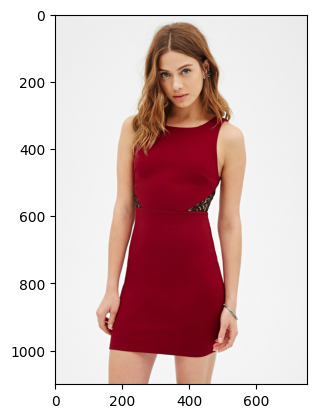

In [57]:
plt.imshow(img)